# Tools To Use

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

import scipy.cluster.hierarchy as sch

In [17]:
df = pd.read_csv("online_shoppers_intention.csv")

# Data Cleaning

The data in the Month, VisitorType, Weekend and Revenue columns is in object and boolean format respectively. In order to make data easier to use these values will all be changed to int or double. 

In [18]:
month_dict = {'Jan':1, 'Feb':2, 'Mar':3,'Apr':4, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
visitor_dict = {'Returning_Visitor':1, 'New_Visitor':2, 'Other':3}
df['Month'].replace(month_dict, inplace=True)
df['VisitorType'].replace(visitor_dict, inplace=True)
weekendToInt = df['Weekend'].astype(int)
df['Weekend'] = weekendToInt
revenueToInt = df['Revenue'].astype(int)
df['Revenue'] = revenueToInt

# Dataset Properties

In [19]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,7.651987,2.124006,2.357097,3.147364,4.069586,1.151176,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.376989,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,1.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,3.000000,1.000000,1.000000


Revenue (TRUE or FALSE) is the dependent variable that we are trying to predict, there are 17 independent variables which we will try and use to predict wether the customer makes a purchase or not.
 - This dataset contains 18 columns of data describing shoppers at a website
 - it contains 12330 entries
 - to ensure that data is easy to work with rows with categorical data will be converted into numerical values, these will include month, VisitorType, Weekend and Revenue

look more into anlyzing this table there may be some interesting findings.

## Correlations Between Variables

Both pearson and spearman correlations will be checked. pearson correlation evaluates the linear relationships between the variables while spearman evaluates the monotonic relationship. A monotonic relationship refers to the scenario when the size of one variable increases as the size of the other is also increasing or when one variable is increasing the other is decreasing. I THINK IT HAS MORE TO DO WITH THE MAGNITUDE

Text(0.5, 1.0, 'Pearson Correlation Heatmap')

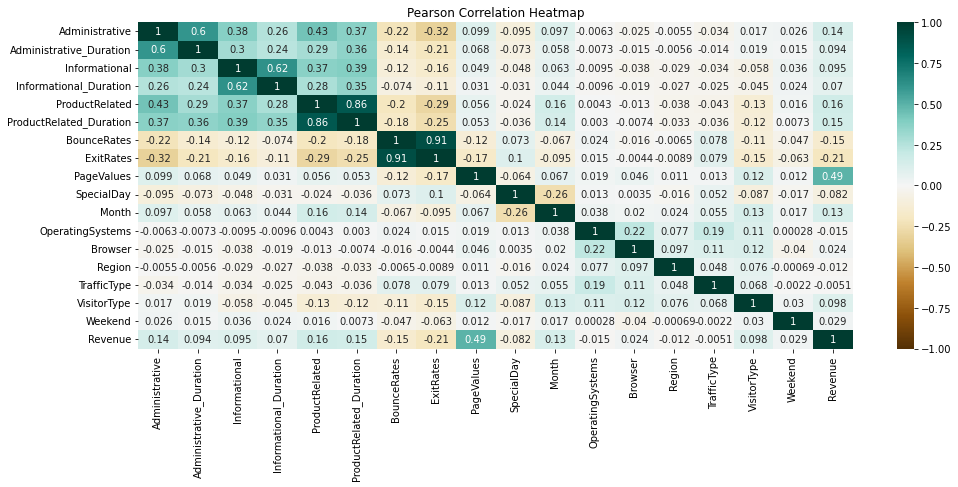

In [5]:
#pearson correlation
plt.figure(figsize=(16,6))
correlation_pearson = df.corr(method="pearson")
heatmap = sea.heatmap(correlation_pearson, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Pearson Correlation Heatmap')

Text(0.5, 1.0, 'Spearman Correlation Heatmap')

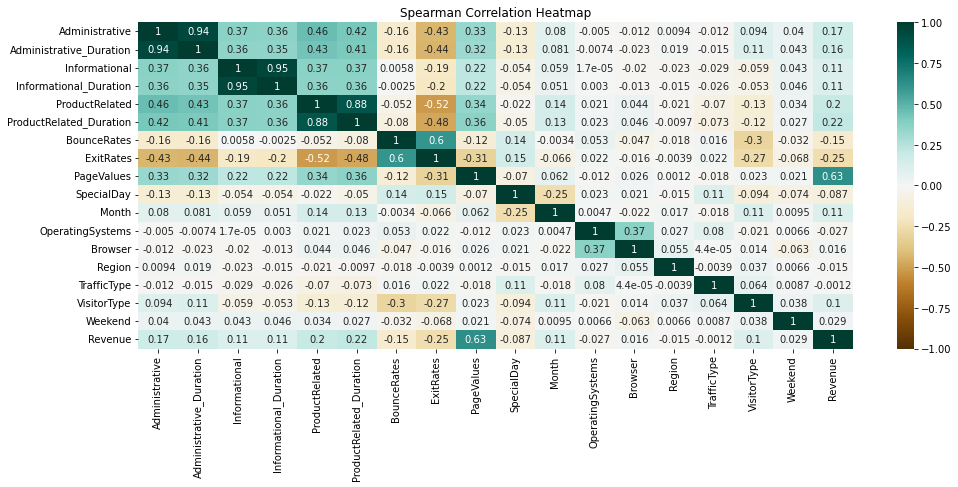

In [6]:
#spearman correlation
plt.figure(figsize=(16,6))
correlation_spearman = df.corr(method="spearman")
heatmap = sea.heatmap(correlation_spearman, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Spearman Correlation Heatmap')

To add to this section:
 - Checking for outliers
 - Plotting histograms
 - idk if i find anything interesting I'll Add it

# Clustering

The first clustering model used will employ hierachical clustering. This method will group similar data types. The reasoning for starting with a hierachical model is the hope of finding some patterns within the data that can be used in the model building  stage
 - will use Kmeans and hierchical to ensure that the results are correct 

In [7]:
#selecting and scaling all of the values so that each numerical value uses the same scale
features_df = df.drop("Revenue", 1) 
scale = StandardScaler()
scaled_features = scale.fit_transform(features_df)

/tmp/ipykernel_2000/211681777.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_df = df.drop("Revenue", 1)


In [8]:
#instanciating the kmeans algorithm
kmeans = KMeans(
    init = "random",
    n_clusters = 5, 
    n_init = 10,
    max_iter = 300, 
)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=5)

In [9]:
kmeans.inertia_

144292.91814527684

In [10]:
kmeans.cluster_centers_

array([[-3.64871371e-01, -2.75701515e-01, -2.17233201e-01,
        -1.71381060e-01, -9.96185198e-02, -1.40955275e-01,
        -9.72608696e-03,  1.29697956e-01, -2.08580460e-01,
         3.13335641e+00, -8.30589703e-01,  3.20261050e-02,
         4.10917615e-02, -4.54160148e-02,  1.67989394e-01,
        -2.99432190e-01, -1.77889020e-01],
       [ 1.56905521e+00,  1.32111960e+00,  1.68153802e+00,
         1.38283983e+00,  1.60288162e+00,  1.51265196e+00,
        -3.27202568e-01, -4.85014737e-01,  1.99874932e-01,
        -2.33321875e-01,  3.50580750e-01, -1.74876823e-02,
        -8.16758867e-02, -1.18637827e-01, -1.20677270e-01,
        -3.41455609e-01,  6.73368002e-02],
       [ 5.73546868e-02,  1.80669863e-02, -1.77642583e-01,
        -1.52021145e-01, -3.15246336e-01, -3.00278230e-01,
        -4.20079890e-01, -5.13675635e-01,  3.48577372e-01,
        -2.89589158e-01,  2.91618717e-01,  6.79117082e-02,
         1.32820221e-01,  1.29043949e-01,  5.41418077e-02,
         2.34998544e+00,  1.0

In [11]:
kmeans.n_iter_

15

In [12]:
kmeans.labels_

array([3, 4, 3, ..., 4, 4, 2], dtype=int32)

Choosing the appropriate number of clusters by using the elbow method. This method simply runs several k-means, incrementing the number of clusters at each iteration and recording the sum of squared error values. As more centroids are added the distance frm each point to the centroid will decrease, there is a sweet spot where the curve breaks and gives us the optimal value for the number of centroids needed. 

Text(0, 0.5, 'Sum of the Squared Error')

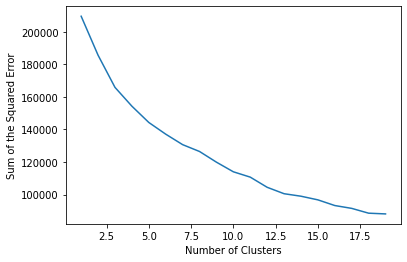

In [13]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300, 
}

#sum of squared error values
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.plot(range(1,20), sse)
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of the Squared Error")

Since the elbow point is not obvious the kneed package will be used to determine the elbow point

In [14]:
kl = KneeLocator(
    range(1,20),
    sse,
    curve = "convex",
    direction = "decreasing"
)

kl.elbow

6

To make sure that this is in fact the correct number of clusters we'll also use the silhouette score to check to make sure 

([<matplotlib.axis.XTick at 0x7f0c1435f490>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

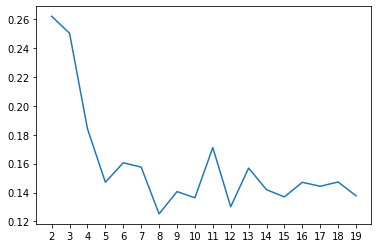

In [20]:
silhouette_coefficients = []
for k in range(2,20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

#plotting the silhouette score
plt.plot(range(2,20), silhouette_coefficients)
plt.xticks(range(2,20))

the method of heirarchical clustering used will be agglomerative. To understand how this clustering works consider a set of five data points. At the beginning each point is a member of its own cluster and at each step a new point is added to the cluster. This point added is chosen based on the distance from the origional point. This step is repeated until there is only 1 single cluster left. 
 - to decide number of clusters we will use a denogram 
 - Decided based on 

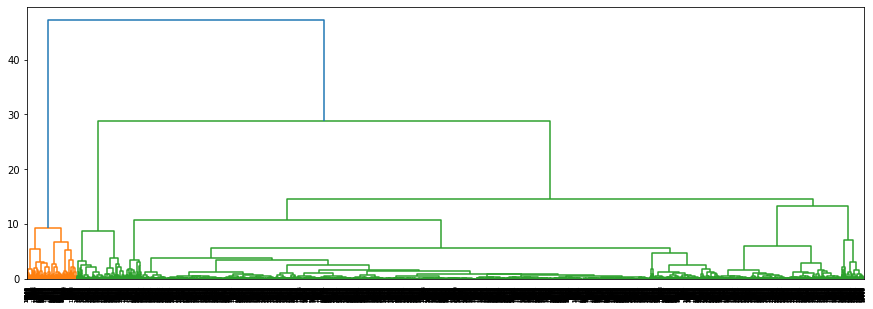

In [26]:
#normalizing data for heirarchical clustering
hierarchical_data = pd.DataFrame(normalize(df), columns=df.columns)
hierarchical_data_X = hierarchical_data[]

#make dendrogram to determine the number of clusters 
plt.figure(figsize=(15,15))
dendrogram = sch.dendrogram(sch.linkage(hierarchical_data, method='ward'))

ValueError: 'c' argument has 12330 elements, which is inconsistent with 'x' and 'y' with size 221940.

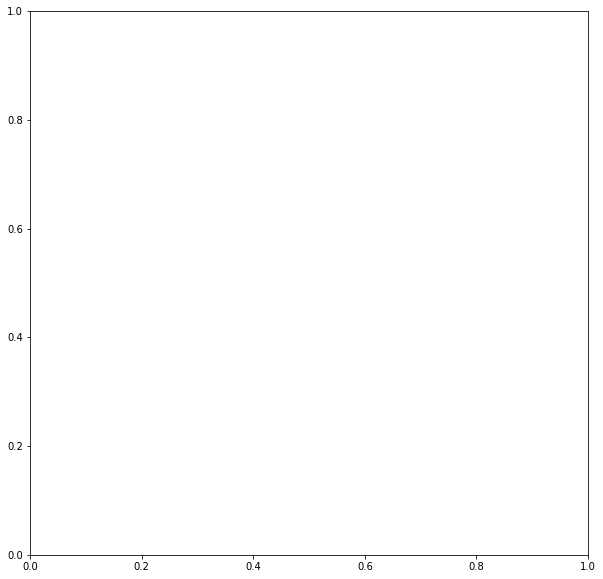

In [29]:
#fitting clustering predictions
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hierarchical_cluster.fit_predict(hierarchical_data)

#plotting the clusters
plt.figure(figsize=(10, 10))
plt.scatter(hierarchical_data, hierarchical_data, c=hierarchical_cluster.labels_, cmap='rainbow')

# Predictors

in the predictor section i will use a classification model to attempt to predict wether or not a certain customer is going to make a purchase or not